In [7]:
from Fit import *
from QuasinormalMode import *
from Waveforms import *
from ModeSelection import *
from postprocess import *
import matplotlib.pyplot as plt

2023-04-08 10:56:57.363299: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-04-08 10:56:57.528937: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-04-08 10:56:57.544084: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIB

In [8]:
from plot import *
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [101]:
eff = True
eff_i = 0
delay = False

# "eff3_a_0.7": "test41"
# "eff3_overtone4_a_0.7_clean_only_320": "test42"
# "eff3_a_0.7_overtone_4": "test43"

Mf = 1
af = 0.7
batch_runname = f"eff3_a_0.7"
runname = "test41"
l, m = 2, 2

N_free = 10

guess_num = 10

In [102]:
t0_arr = np.linspace(0, 50, num = 501)
qnm_fixed_list = []
nonconvergence_cut = False

In [103]:
result_fulls = []

In [104]:
if eff:
    runname_full = f"{batch_runname}_{eff_i:03d}_Nfree_{N_free}_{runname}"
    run_string_prefix = f"{batch_runname}_{eff_i:03d}_convergence_{runname}"

    inject_params = read_json_for_param_dict(eff_i, batch_runname)
    h = make_eff_ringdown_waveform_from_param(inject_params, delay = delay)
else:
    SXS_num = batch_runname
    runname_full = f"{SXS_num}_lm_{l}{m}_Nfree_{N_free}_{runname}"
    run_string_prefix = f"{SXS_num}_lm_{l}{m}_convergence_{runname}"

In [105]:
guess_num_list = list(range(guess_num))
run_string_prefixes = [f"{run_string_prefix}_{i}" for i in guess_num_list]

In [106]:
fit_results = []

for run_string_prefix in run_string_prefixes:
    try:
        result = get_result(
                    run_string_prefix, 
                    t0_arr, qnm_fixed_list,
                    N_free, nonconvergence_cut = nonconvergence_cut
                      )
        fit_results.append(result)
    except:
        pass

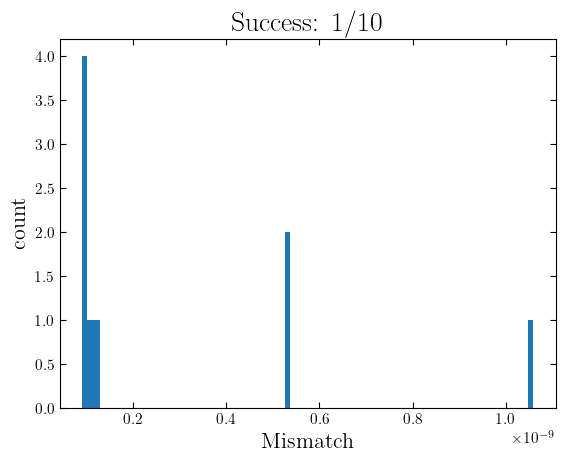

In [107]:
mismatch_all = []
for j, result_full in enumerate(fit_results):
    mismatch = result_full.mismatch_arr
    mismatch_all.append(mismatch[0])
mismatch_all = np.array(mismatch_all)
suc_num = len(mismatch_all[mismatch_all < 1.001*np.nanmin(mismatch_all)])

fig, ax = plt.subplots()
ax.hist(mismatch_all, bins = 100)
ax.set_title(f'Success: {suc_num}/{guess_num}', fontsize = 20)
ax.set_xlabel('Mismatch', fontsize = 16)
ax.set_ylabel('count', fontsize = 16)

plt.savefig(PLOT_PATH + f"{runname_full}_mismatch_hist.pdf", bbox_inches = "tight")
plt.savefig(PLOT_PATH + f"{runname_full}_mismatch_hist.png", dpi = 150, bbox_inches = "tight",
            facecolor='white', transparent=False)


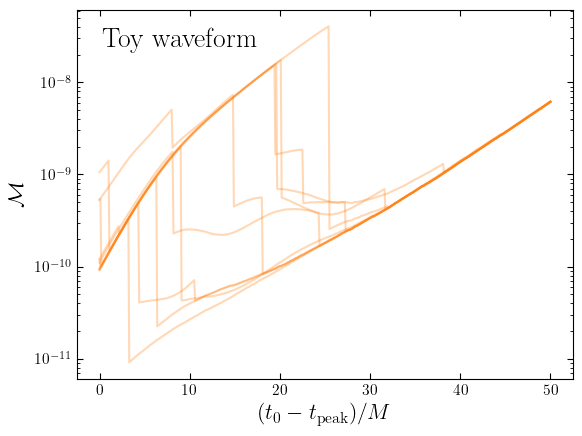

In [108]:
fig, ax = plt.subplots()
for j, result_full in enumerate(fit_results):
    # if j != 0 and j != 6:
        # continue
    mismatch = result_full.mismatch_arr
    ax.semilogy(t0_arr, mismatch, 
                c = "C1", alpha = 0.3,
                # label = f"{j}",
                )
ax.set_xlabel(r'$(t_0 - t_{\rm peak}) / M$', fontsize = 16)
ax.set_ylabel(r'$\mathcal{M}$', fontsize = 16)
ax.text(0.05, 0.95, 'Toy waveform', fontsize = 20, color = 'k',
        horizontalalignment='left', verticalalignment='top',
        transform=ax.transAxes)

plt.savefig(PLOT_PATH + f"{runname_full}_mismatch_vs_t.pdf", bbox_inches = "tight")
plt.savefig(PLOT_PATH + f"{runname_full}_mismatch_vs_t.png", dpi = 150)


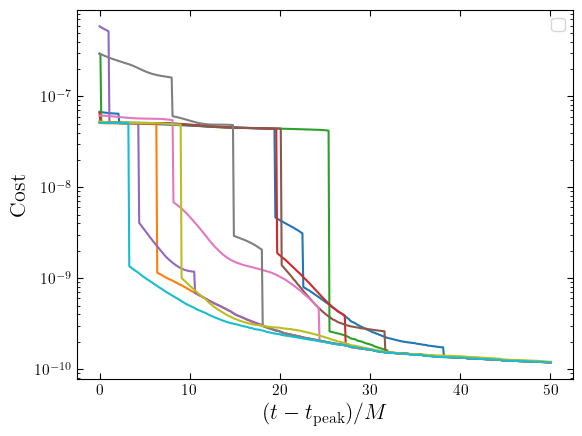

In [109]:
fig, ax = plt.subplots()
for j, result_full in enumerate(fit_results):
    # if j != 0 and j != 6:
        # continue
    cost = result_full.cost_arr
    ax.semilogy(t0_arr, cost, 
                # label = f"{j}",
                )
ax.set_xlabel(r'$(t - t_{\rm peak}) / M$', fontsize = 16)
ax.set_ylabel('Cost', fontsize = 16)
ax.legend()
# plt.savefig(PLOT_PATH + f"{runname_full}_cost_vs_t.pdf", bbox_inches = "tight")
# plt.savefig(PLOT_PATH + f"{runname_full}_cost_vs_t.png", dpi = 150)

In [110]:
fit_results[0].status_arr

array([2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2,
       3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 4,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3, 1,
       3, 2, 3, 3, 3, 2, 2, 4, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 2, 3, 3, 3, 3, 4, 3, 3, 1, 3, 3, 2, 1, 2, 2, 1, 2, 1, 3,
       2, 1, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 1, 3, 2, 1, 1, 3, 3, 3, 3,
       1, 3, 3, 3, 1, 2, 1, 2, 1, 3, 3, 1, 1, 1, 1,

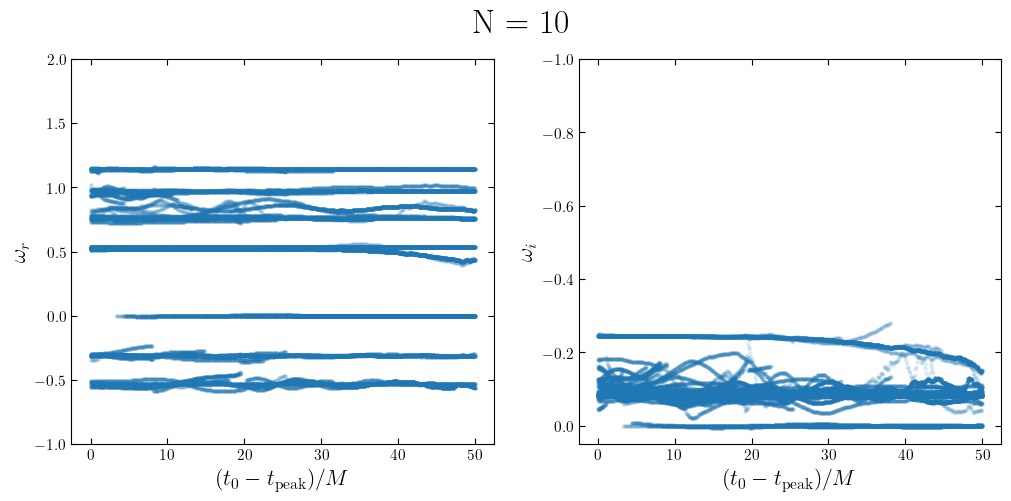

In [111]:
fig, axs = plt.subplots(1, 2, figsize = (12, 5))

for j, result_full in enumerate(fit_results):
    omega_dict = result_full.omega_dict
    for i in range(N_free):
        axs[0].scatter(t0_arr,
                    omega_dict['real'][f'omega_r_free_{i}'], 
                    s = 5, c = f'C0', alpha = 0.1)
        axs[1].scatter(t0_arr, 
                    omega_dict['imag'][f'omega_i_free_{i}'], 
                    s = 5, c = f'C0', alpha = 0.1)
axs[0].set_ylim(-1, 2)
axs[1].set_ylim(0.05, -1)
axs[0].set_xlabel(r"$(t_0 - t_{\rm peak})/M$", fontsize = 16)
axs[1].set_xlabel(r"$(t_0 - t_{\rm peak})/M$", fontsize = 16)
axs[0].set_ylabel(r"$\omega_r$", fontsize = 16)
axs[1].set_ylabel(r"$\omega_i$", fontsize = 16)
fig.suptitle(f"N = {N_free}", fontsize = 24)

plt.savefig(PLOT_PATH_ROOT + f"convergence_{runname_full}.pdf", bbox_inches = "tight")
plt.savefig(PLOT_PATH_ROOT + f"convergence_{runname_full}.png", dpi = 150, bbox_inches = "tight",
            facecolor='white', transparent=False)

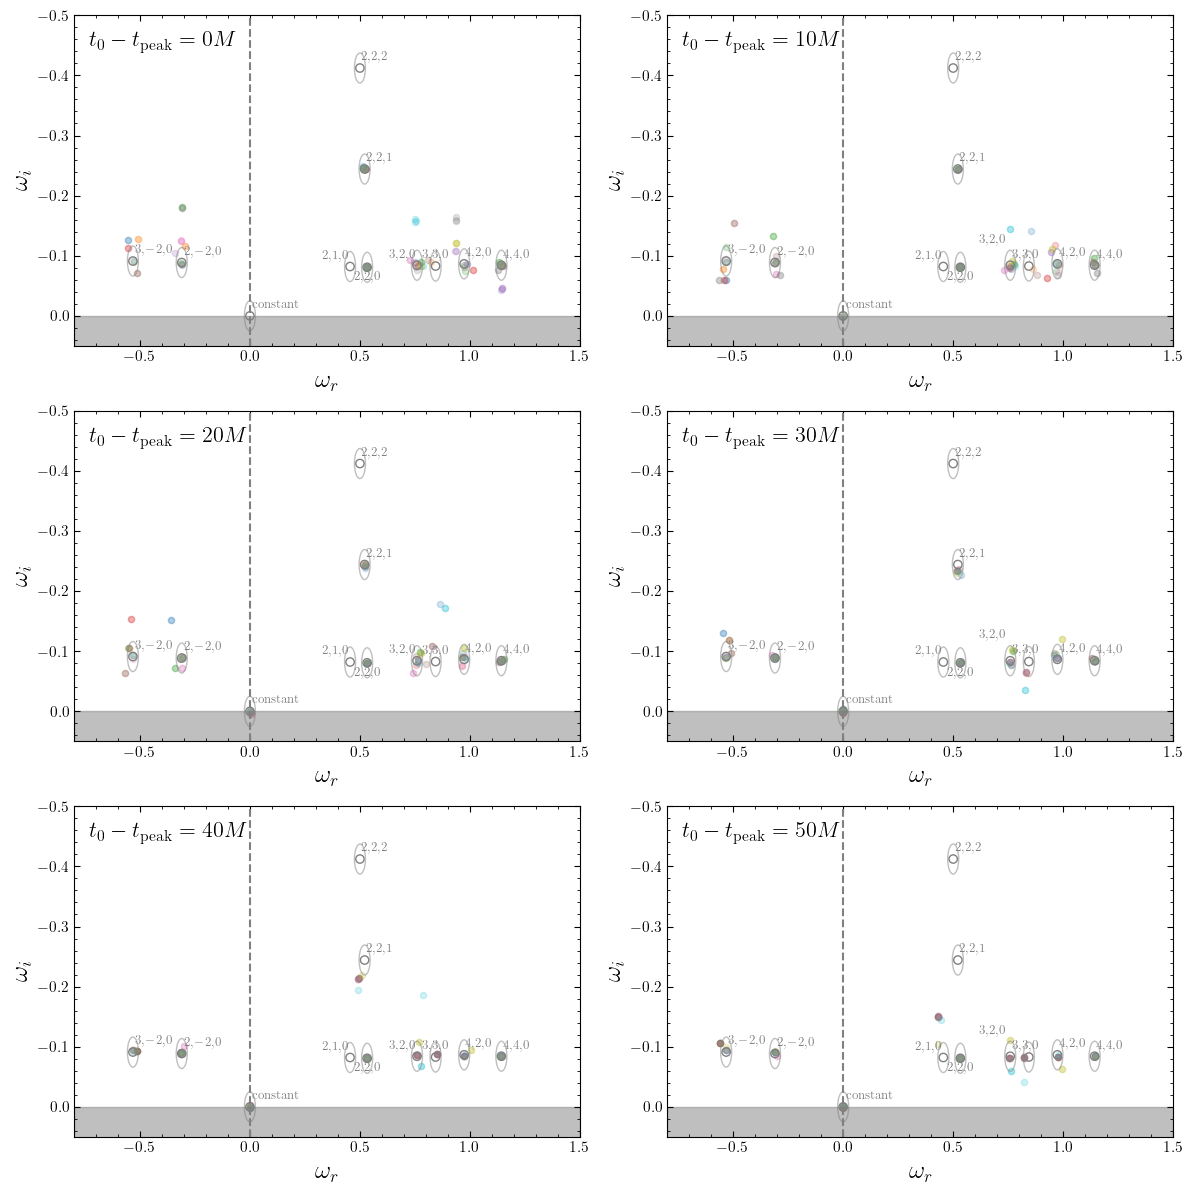

In [112]:
t_plots = np.linspace(0, 50, num = 6)
qnm_fixed_list = long_str_to_qnms("2.2.0_2.2.1_2.2.2_2.2.3_2.2.4"
                                "_3.2.0_3.3.0_4.4.0_2.1.0"
                                "_3.-2.0_2.-2.0_4.2.0_constant", Mf, af)
# qnm_fixed_list = long_str_to_qnms("2.2.0_2.2.1_2.2.2_2.2.3_2.2.4"
#                                 "_3.2.0_constant", Mf, af)

fig, axs = plt.subplots(3, 2, figsize = (12, 12))

for i, t_plot in enumerate(t_plots):
    ax = axs.reshape(-1)[i]
    t0_index = np.argmin(np.abs(t0_arr - t_plot))
    for j, result_full in enumerate(fit_results):
        omega_dict = result_full.omega_dict
        A_dict = result_full.A_dict
        for i in range(N_free):
            ax.scatter(omega_dict['real'][f'omega_r_free_{i}'][t0_index], 
                        omega_dict['imag'][f'omega_i_free_{i}'][t0_index],
                        s = 20, c = f'C{j}', alpha = 0.2)
    ax.text(0.03, 0.95, r'$t_0 - t_{\rm peak} =' + f'{int(t_plot)} M$', fontsize = 16, color = 'k',
            horizontalalignment='left', verticalalignment='top',
            transform=ax.transAxes)
    ax.set_xlim(-0.8, 1.5)
    # ax.set_xlim(0.2, 0.8)
    ax.set_ylim(0.05, -0.5)
    plot_predicted_qnms(ax, qnm_fixed_list, change_lim = False, ellipse_facecolor= 'none', 
                        expand_points = (1.1, 1.7),
                        label_offset = (0., 0.)
                        )
fig.tight_layout()

plt.savefig(PLOT_PATH + f"{runname_full}_omega_vs_t.pdf", bbox_inches = "tight")
plt.savefig(PLOT_PATH + f"{runname_full}_omega_vs_t.png", dpi = 150)

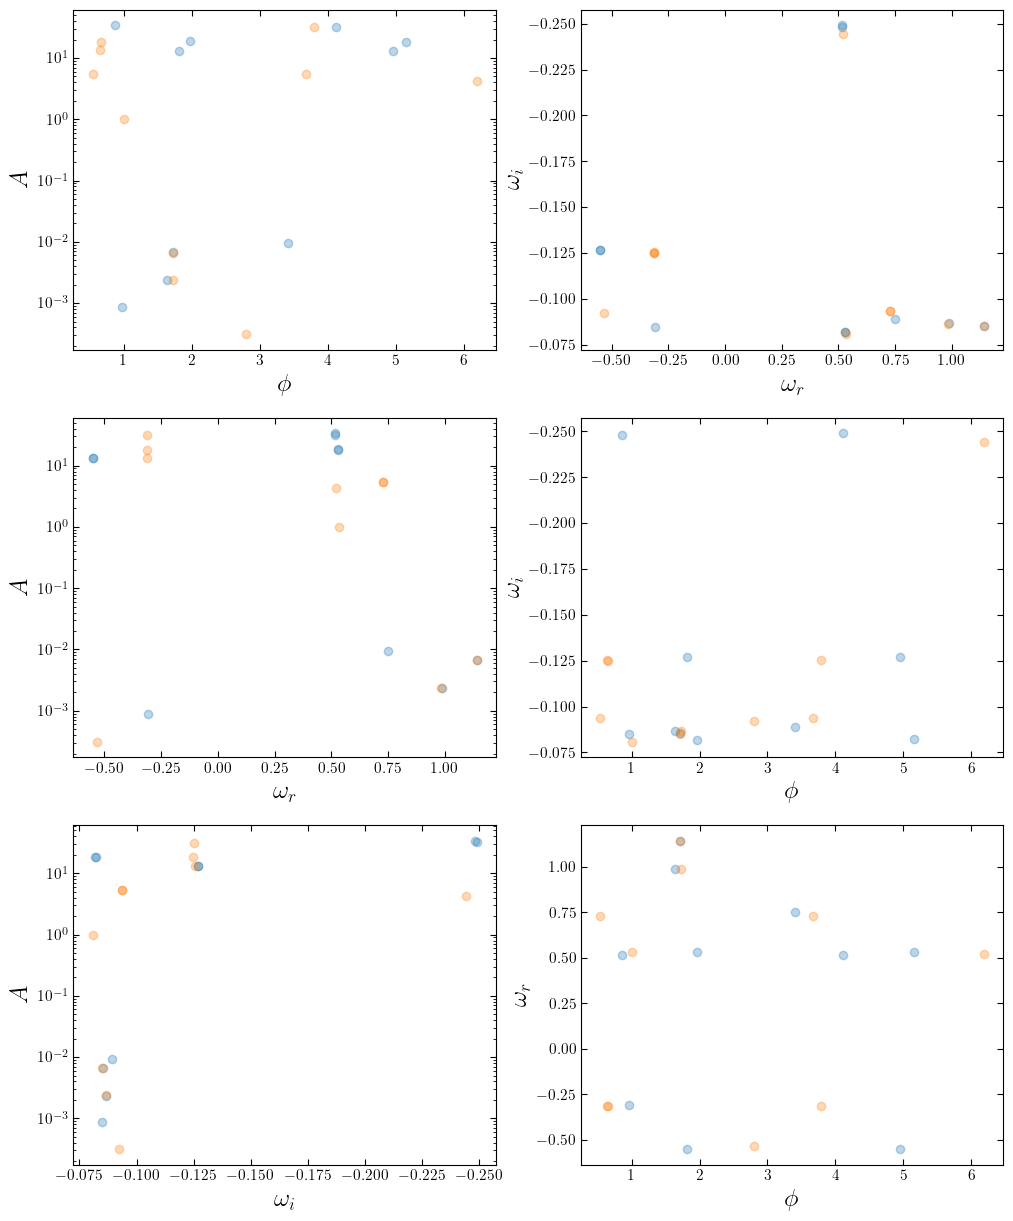

In [ ]:
fig, axs = plt.subplots(3, 2, figsize = (12, 15))

alpha = 0.3
color_i = 0
for kk, k in enumerate([0, 6]):
    if kk == 0:
        color = "C0"
    else:
        color = "C1"
    A_arr = np.array(list(fit_results[k].A_dict.values()))[:, 0]
    phi_arr = np.array(list(fit_results[k].phi_dict.values()))[:, 0]%(2*np.pi)
    omegar_arr = np.array(list(fit_results[k].omega_r_dict.values()))[:, 0]
    omegai_arr = np.array(list(fit_results[k].omega_i_dict.values()))[:, 0]
    axs[0,0].scatter(phi_arr, A_arr, c = color, alpha = alpha)
    axs[0,1].scatter(omegar_arr, omegai_arr, c = color, alpha = alpha)
    axs[1,0].scatter(omegar_arr, A_arr, c = color, alpha = alpha)
    axs[1,1].scatter(phi_arr, omegai_arr, c = color, alpha = alpha)
    axs[2,0].scatter(omegai_arr, A_arr, c = color, alpha = alpha)
    axs[2,1].scatter(phi_arr, omegar_arr, c = color, alpha = alpha)

axs[0,0].set_xlabel(r"$\phi$")
axs[0,0].set_ylabel(r"$A$")
axs[0,0].set_yscale("log")
axs[0,1].set_xlabel(r"$\omega_r$")
axs[0,1].set_ylabel(r"$\omega_i$")
axs[0,1].invert_yaxis()
axs[1,0].set_xlabel(r"$\omega_r$")
axs[1,0].set_ylabel(r"$A$")
axs[1,0].set_yscale("log")
axs[1,1].set_xlabel(r"$\phi$")
axs[1,1].set_ylabel(r"$\omega_i$")
axs[1,1].invert_yaxis()
axs[2,0].set_xlabel(r"$\omega_i$")
axs[2,0].set_ylabel(r"$A$")
axs[2,0].set_yscale("log")
axs[2,1].set_xlabel(r"$\phi$")
axs[2,1].set_ylabel(r"$\omega_r$")
axs[2,0].invert_xaxis()

In [ ]:
np.array(list(fit_results[0].omega_r_dict.values()))[:, 0]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])